# 확률적 경사 하강법

In [2]:
import pandas as pd
fish = pd.read_csv('http://bit.ly/fish_csv')

In [3]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [4]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [6]:
#데이터 전처리(train-test)
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input,fish_target, random_state=42)

In [8]:
#데이터 전처리(Scaling)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [10]:
# 확률적 경사 하강법을 제공하는 대표적인 분류용 클래스 SGDClassifier
from sklearn.linear_model import SGDClassifier

In [11]:
# loss = 'log' -> 손실함수를 로지스틱 손실함수    # max_iter = 수행할 에포크 횟수 (훈련세트 반복횟수)
sc = SGDClassifier(loss = 'log', max_iter = 10, random_state = 42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


C:\Users\LG\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


* ConvergenceWarning : 모델이 충분히 수렴하지 않았다는 경고를 보냅니다. 이때, max_iter를 늘려주면 해결 가능합니다. 

In [12]:
# 점진적 훈련법: sc.partial_fit() -> sc.fit 훈련을 추가적으로 할 수 있다. (1 에포크씩 이어서)
sc.partial_fit(train_scaled,train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.825


In [16]:
# 에포크의 과대적합과 과소적합이 일어날 수 있다. 
# 따라서 과대적합이 시작하기 전 훈련을 멈춰보자(조기 종료)
import numpy as np
sc = SGDClassifier(loss = 'log', random_state = 42)
train_score = []
test_score = []
classes = np.unique(train_target)

In [18]:
for _ in range(0,300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

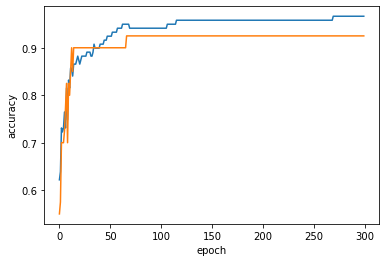

In [19]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

* 확실히 에포크 초기에는 과소적합된 모습을 볼 수 있습니다. 
* 백 번째 에포크 이후에 훈련세트와 테스트 세트의 점수차이가 조금씩 불어져 과대적합이 이루어지고 있는 모습을 볼 수 있습니다.
* 그렇다면 우리는 100번째에서 조기 종료할 수 있다. 

In [20]:
sc = SGDClassifier(loss = 'log', max_iter = 100, tol = None, random_state = 42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


* tol 매개변수를 None으로 지정하여 자동으로 멈추지 않고 max_iter = 100 만큼 무조건 반복하도록 하였다. 